In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utility_functions as uf

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\paulw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\paulw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\paulw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\paulw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\paulw\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
import pandas as pd
pd.set_option('display.max_colwidth',0)
import numpy as np
from numpy import hstack, asarray, vstack

import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import random
from os import listdir
from collections import Counter
from tqdm import tqdm
from datetime import datetime

import string
import re
from string import punctuation
import nltk

nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt")
nltk.downloader.download("vader_lexicon")
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
lemmatizer = WordNetLemmatizer()
Stop_Words = stopwords


from wordcloud import WordCloud
import wordcloud



def show_wordcloud(data, column_n, title):
    '''Prints the wordcloud. Adapted from the function provided in the lecture.'''
    #println(data)
    text = ' '.join(data[column_n].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,
        max_font_size=100, max_words=100, background_color="white").generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud, interpolation="bilinear")  
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()
    
    
def text_processing(text):
    # remove punctuation 
    text = "".join([c for c in text 
                    if c not in string.punctuation])
    # lowercase
    text = "".join([c.lower() for c in text])
    # remove stopwords
    text = " ".join([w for w in text.split() 
                     if w not in Stop_Words])
    # stemming / lematizing (optional)
    text = " ".join([lemmatizer.lemmatize(w) for w in text.split()])
    return text



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\paulw\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\paulw\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\paulw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\paulw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\paulw\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [24]:
def text_processing(text):
    # remove punctuation 
    text = "".join([c for c in text 
                    if c not in string.punctuation])
    # lowercase
    text = "".join([c.lower() for c in text])
    # remove stopwords
    text = " ".join([w for w in text.split() 
                     if w not in Stop_Words])
    # stemming / lematizing (optional)
    text = " ".join([lemmatizer.lemmatize(w) for w in text.split()])
    return text

from nltk.sentiment.vader import SentimentIntensityAnalyzer

def get_sentiment_intensity(data_):
    '''
    Parameters
    ----------
    data : TYPE
        DESCRIPTION.

    Returns
    -------
    sentiment : TYPE
        DESCRIPTION.

    '''

    score = SentimentIntensityAnalyzer().polarity_scores(data_)
    neg = score["neg"]
    pos = score["pos"]
    if neg > pos:
        sentiment = -1
    elif pos > neg:
        sentiment = 1
    else: 
        sentiment = 0

    return sentiment

In [2]:
raw = pd.read_csv("../data/raw/train.csv")

In [25]:
#get_sentiment_intensity(raw["article"])
sentiment_ = raw["article"].apply(get_sentiment_intensity)

In [39]:
np.savez("../data/interim/sentiment_article.npz", sentiment_)

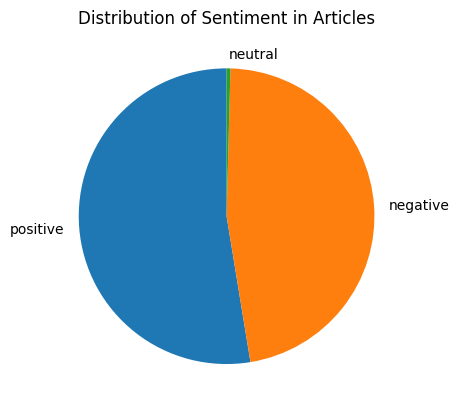

In [36]:
plt.pie(sentiment_.value_counts(), labels=["positive", "negative", "neutral"], startangle=90)
plt.title("Distribution of Sentiment in Articles")
plt.show()

In [37]:
sentiment_high_ = raw["highlights"].apply(get_sentiment_intensity)

In [40]:
np.savez("../data/interim/sentiment_highlight.npz", sentiment_high_)

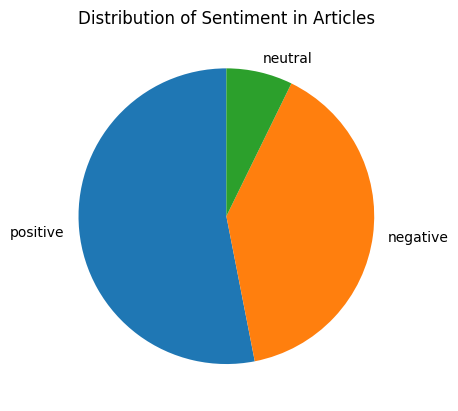

<Figure size 640x480 with 0 Axes>

In [38]:
plt.pie(sentiment_high_.value_counts(), labels=["positive", "negative", "neutral"], startangle=90)
plt.title("Distribution of Sentiment in Articles")
plt.show()
plt.savefig("dist_sentiment_highlights.png")

In [22]:
raw["article"].head().apply(get_sentiment_intensity)

0   -1
1   -1
2   -1
3   -1
4    1
Name: article, dtype: int8

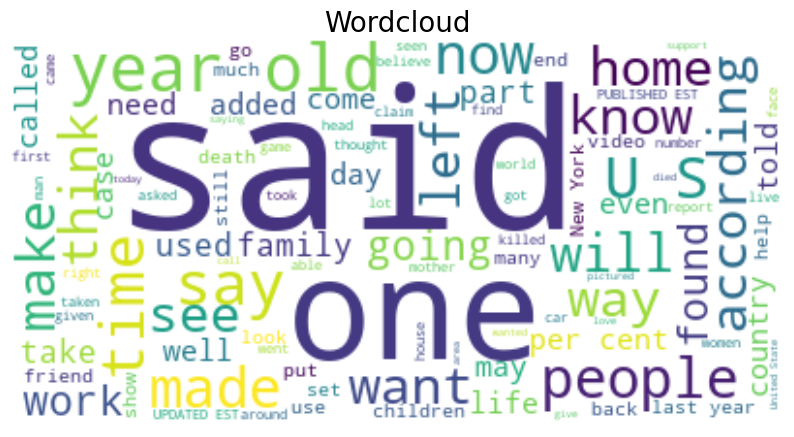

In [9]:
show_wordcloud(raw, "article", "Wordcloud")
plt.savefig("../reports/figures/wordcloud.png")

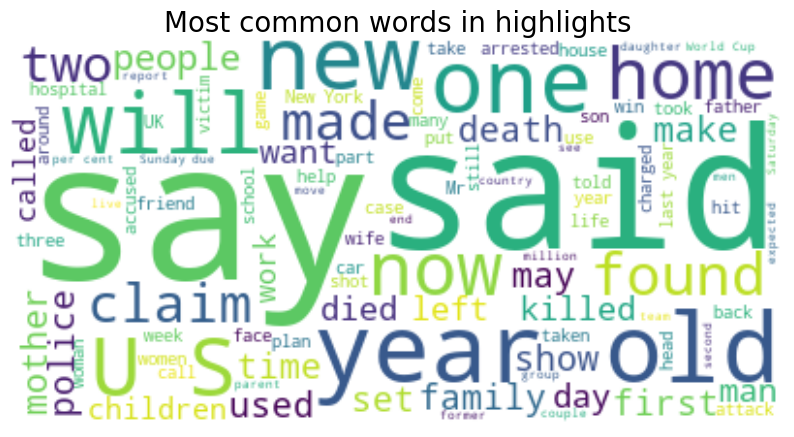

<Figure size 640x480 with 0 Axes>

In [27]:
uf.show_wordcloud(raw, "highlights", "Most common words in highlights")
plt.savefig("../reports/figures/wordcloud_highlights.png")

In [10]:
raw.describe()

id  \
count   287113                                     
unique  287113                                     
top     0001d1afc246a7964130f43ae940af6bc6c57f01   
freq    1                                          

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

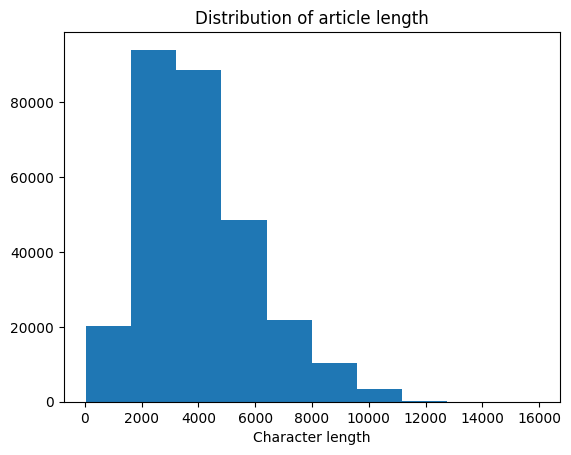

<Figure size 640x480 with 0 Axes>

In [18]:
plt.hist(raw["article"].apply(lambda x: len(x)))
plt.title("Distribution of article length")
plt.xlabel("Character length")
plt.show()
plt.savefig('../reports/figures/article_length.png')

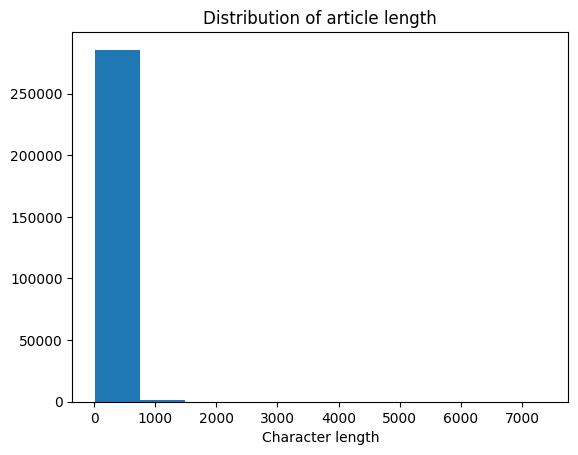

<Figure size 640x480 with 0 Axes>

In [19]:
plt.hist(raw["highlights"].apply(lambda x: len(x)))
plt.title("Distribution of article length")
plt.xlabel("Character length")
plt.show()
plt.savefig('../reports/figures/highlight_length.png')

In [22]:
uf

AttributeError: module 'utility_functions' has no attribute 'get_sentiment_intensity'